In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   
        
#importing seaborn for statistical plotsa
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [4]:
df=pd.read_excel("file:////Users/venkateswarlusayana/ABDD/Bank_Personal_Loan_Modelling.xlsx", sheetname=1,header=0)

In [5]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
#Making the values in Experience column to Zero for values which are negative
datadf_processed =df
datadf_processed['Experience'] = (datadf_processed['Experience']).abs()

In [7]:
# Dropping the ID , ZIP Code column as they do not have any relevance to whether a customer can be turned into a Personal Loan customer.
datadf_processed = datadf_processed.drop('ZIP Code', axis=1)
datadf_processed = datadf_processed.drop('ID', axis=1)

In [8]:
datadf_processed.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
datadf_processed['Education'] = datadf_processed['Education'].replace({1: 'UnderGrad', 2: 'Grad', 3: 'Prof'})
#datadf_processed['Personal Loan'] = datadf_processed['Personal Loan'].replace({1: 'Yes', 0: 'No'})
datadf_processed['Securities Account'] = datadf_processed['Securities Account'].replace({1: 'Yes', 0: 'No'})
datadf_processed['CD Account'] = datadf_processed['CD Account'].replace({1: 'Yes', 0: 'No'})
datadf_processed['Online'] = datadf_processed['Online'].replace({1: 'Yes', 0: 'No'})
datadf_processed['CreditCard'] = datadf_processed['CreditCard'].replace({1: 'Yes', 0: 'No'})
datadf_processed = pd.get_dummies(datadf_processed, columns=['Education'])
#datadf_processed = pd.get_dummies(datadf_processed, columns=['Personal Loan'])
datadf_processed = pd.get_dummies(datadf_processed, columns=['Securities Account'])
datadf_processed = pd.get_dummies(datadf_processed, columns=['CD Account'])
datadf_processed = pd.get_dummies(datadf_processed, columns=['Online'])
datadf_processed = pd.get_dummies(datadf_processed, columns=['CreditCard']

In [10]:
datadf_processed.dtypes

Age                         int64
Experience                  int64
Income                      int64
Family                      int64
CCAvg                     float64
Mortgage                    int64
Personal Loan               int64
Education_Grad              uint8
Education_Prof              uint8
Education_UnderGrad         uint8
Securities Account_No       uint8
Securities Account_Yes      uint8
CD Account_No               uint8
CD Account_Yes              uint8
Online_No                   uint8
Online_Yes                  uint8
CreditCard_No               uint8
CreditCard_Yes              uint8
dtype: object

In [11]:
datadf_processed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Education_Grad,5000.0,0.280600,0.449337,0.0,0.0,0.0,1.0,1.0
Education_Prof,5000.0,0.300200,0.458391,0.0,0.0,0.0,1.0,1.0
Education_UnderGrad,5000.0,0.419200,0.493478,0.0,0.0,0.0,1.0,1.0


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


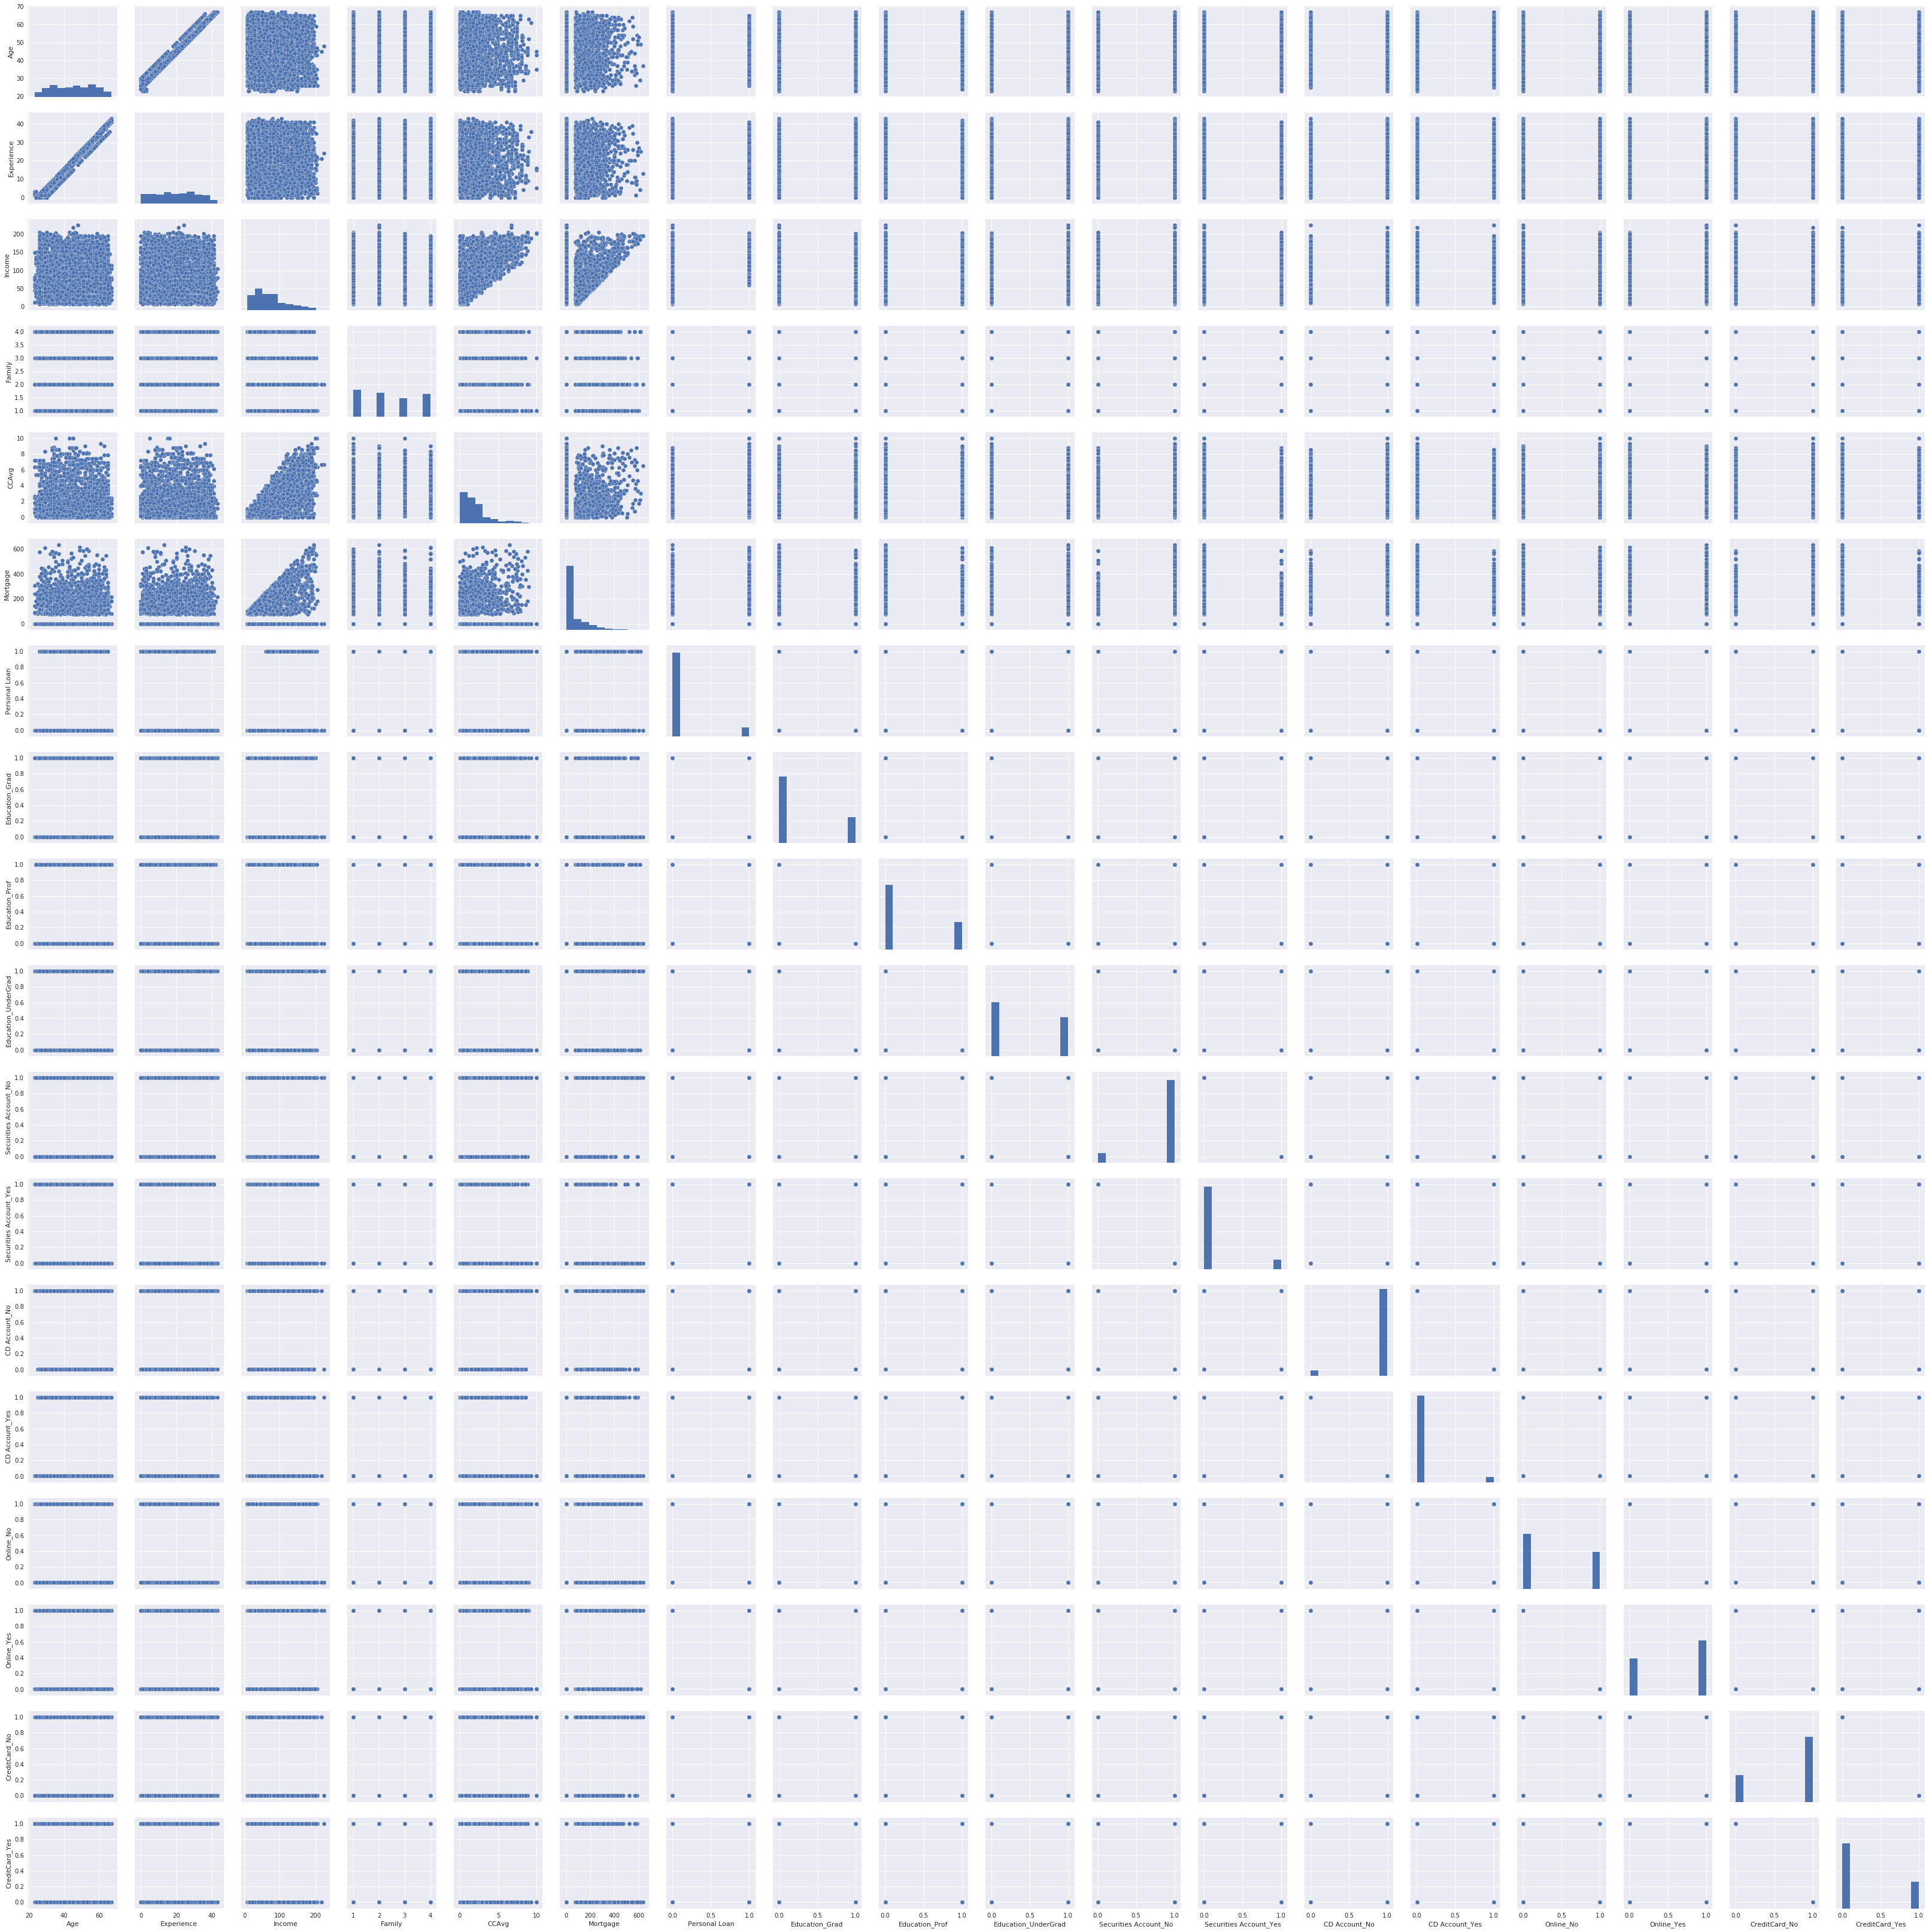

In [12]:
sns.pairplot(datadf_processed)

In [13]:
#Age : The mean is 45.33 and median is 45. This tell us that the data is distributed evenly and there is no skew.At the same time its not normal distribution as the data looks evenly distributed.
#Experience : The mean is 20.13 and median is 20.This tell us that the data is distributed evenly and there is no skew.At the same time its not normal distribution as the data looks evenly distributed.
#Income : The mean is 73.77 and median is 64. This appears  skewed to right
#Age : The mean is 2.3 and median is 2. This is again evenly distributed attributed.Not a normal distribution though.
#CCAvg : the mean 1.937 and median is 1.5. This is right skewed distribution.
#Mortgage : The mean is 56.49 and median is 0 which tell us that its highly skewed to right.But we cannot do outlier treatment here as the count of customer who has house mortgage is significant number.

In [14]:
X = datadf_processed.drop('Personal Loan', axis=1)
y = datadf_processed[['Personal Loan']]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn import svm

In [17]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.958
[[1346    5]
 [  58   91]]


In [18]:
# Kernal = Linear ; gamma = 10 ; C= 1
clf = svm.SVC(kernel='linear',C=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.958
[[1342    9]
 [  54   95]]


In [19]:
# Kernal = Linear ; gamma = 10 ; C= 1
clf = svm.SVC(kernel='linear',C=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.954666666667
[[1338   13]
 [  55   94]]


In [20]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='rbf' , C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.905333333333
[[1348    3]
 [ 139   10]]


In [21]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='rbf',C=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.908
[[1333   18]
 [ 120   29]]


In [22]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='rbf',C=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.906666666667
[[1331   20]
 [ 120   29]]


In [ ]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='poly',C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.969333333333
[[1324   27]
 [  19  130]]


In [ ]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='poly',C=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

In [ ]:
# Kernal = Linear ; gamma = auto ; C= 1
clf = svm.SVC(kernel='poly',C=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))